In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
# AAPL Momentum Strategy: 50-day vs 200-day SMA
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Download AAPL historical data
data = yf.download('AAPL', start='2015-01-01', end='2024-01-01')
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
# Generate trading signals
data['Signal'] = 0
data.loc[data['SMA_50'] > data['SMA_200'], 'Signal'] = 1
data['Position'] = data['Signal'].shift()

In [7]:
# Calculate strategy returns
data['Daily Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['Position'] * data['Daily Return']

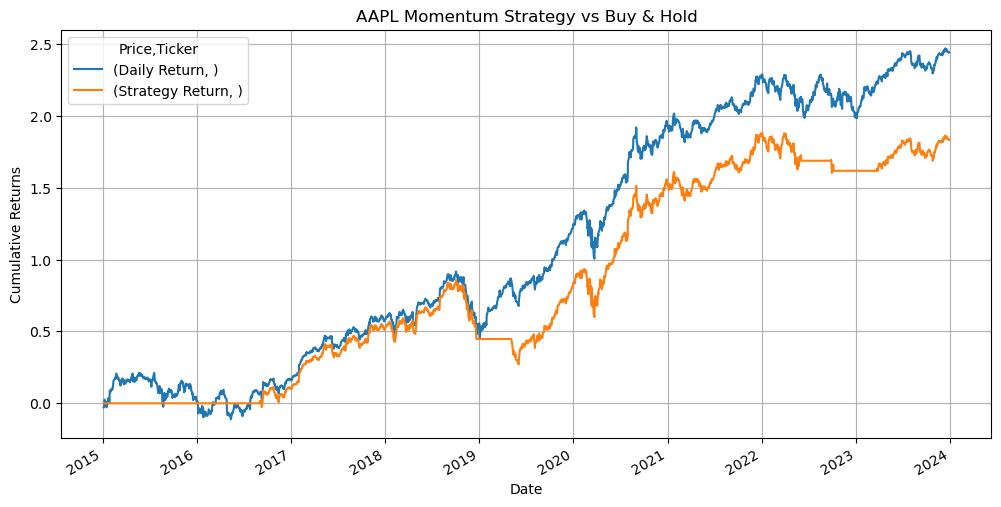

In [8]:
# Plot performance
data[['Daily Return', 'Strategy Return']].cumsum().plot(figsize=(12, 6))
plt.title('AAPL Momentum Strategy vs Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()